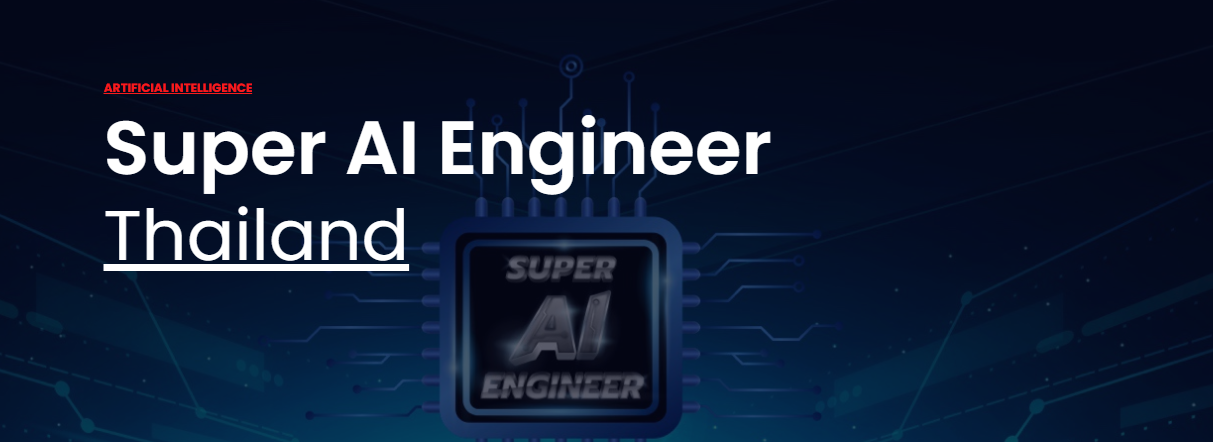

#Demo RAFT
#เขียนโดย 22p27c0357-เป้-Kideee-Super AI (บ้าน Kidee)
tuchsanai@gmail.com

In [ ]:
!gdown --id 1nJreyqkk7pIp_TQym9hbABtWlvVB2THO
!unzip -q *.zip

Downloading...
From: https://drive.google.com/uc?id=1nJreyqkk7pIp_TQym9hbABtWlvVB2THO
To: /content/raft-pytorch.zip
46.1MB [00:00, 127MB/s] 


In [ ]:
import os
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from glob import glob
from PIL import Image
from tqdm import tqdm

In [ ]:
sys.path.append('raft-pytorch/')


from raft.core.raft import RAFT
from raft.core.utils import flow_viz
from raft.core.utils.utils import InputPadder
from raft.config import RAFTConfig

config = RAFTConfig(
    dropout=0,
    alternate_corr=False,
    small=False,
    mixed_precision=False
)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

weights_path = 'raft-sintel.pth'

ckpt = torch.load(weights_path, map_location=device)

model = RAFT(config)
model.to(device)
model.load_state_dict(ckpt)

device: cpu


<All keys matched successfully>

In [ ]:
image_files = glob('raft/demo-frames/*.png')
image_files = sorted(image_files)

print(f'Found {len(image_files)} images')
print(sorted(image_files))

Found 10 images
['raft/demo-frames/frame_0016.png', 'raft/demo-frames/frame_0017.png', 'raft/demo-frames/frame_0018.png', 'raft/demo-frames/frame_0019.png', 'raft/demo-frames/frame_0020.png', 'raft/demo-frames/frame_0021.png', 'raft/demo-frames/frame_0022.png', 'raft/demo-frames/frame_0023.png', 'raft/demo-frames/frame_0024.png', 'raft/demo-frames/frame_0025.png']


In [ ]:
def load_image(imfile, device):
    img = np.array(Image.open(imfile)).astype(np.uint8)
    img = torch.from_numpy(img).permute(2, 0, 1).float()

    return img[None].to(device)


def viz(img1, img2, flo):
    img1 = img1[0].permute(1,2,0).cpu().numpy()
    img2 = img2[0].permute(1,2,0).cpu().numpy()
    flo = flo[0].permute(1,2,0).cpu().numpy()
    
    # map flow to rgb image
    flo = flow_viz.flow_to_image(flo)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    ax1.set_title('input image1')
    ax1.imshow(img1.astype(int))
    ax2.set_title('input image2')
    ax2.imshow(img2.astype(int))
    ax3.set_title('estimated optical flow')
    ax3.imshow(flo)
    plt.show()

0it [00:00, ?it/s]

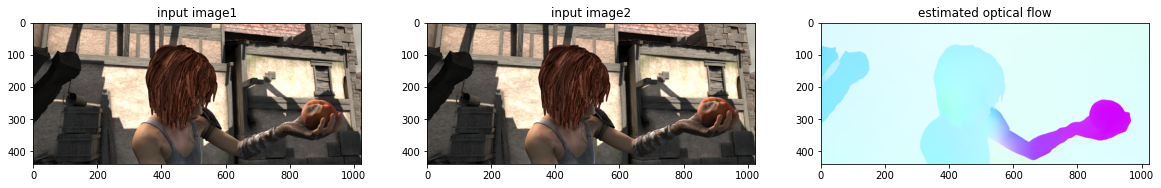

1it [00:25, 25.96s/it]

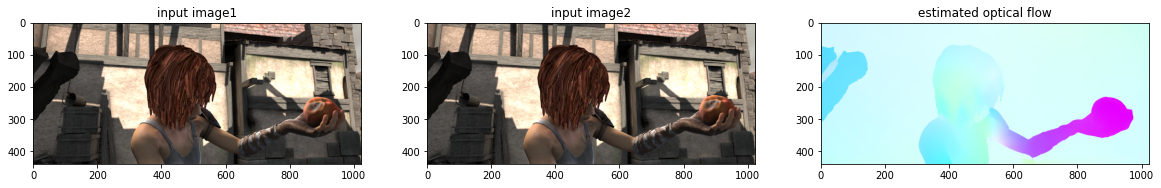

2it [00:51, 25.73s/it]

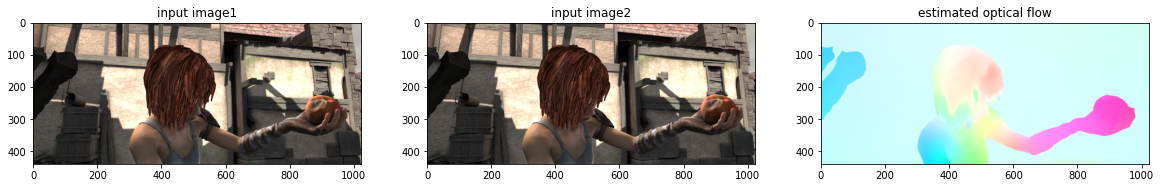

3it [01:16, 25.55s/it]

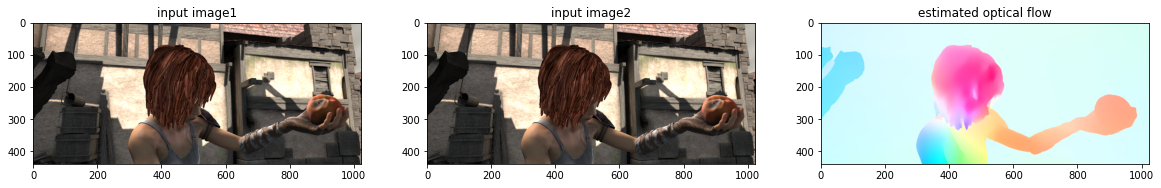

4it [01:42, 25.70s/it]

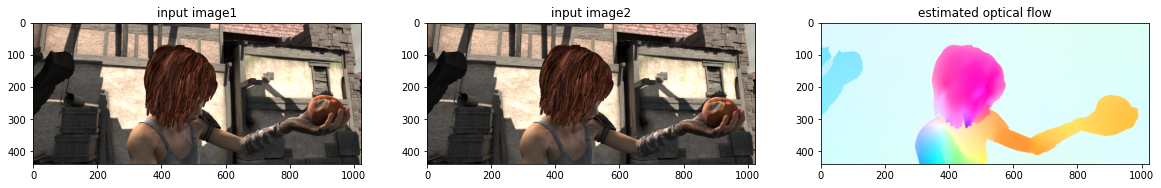

5it [02:08, 25.75s/it]

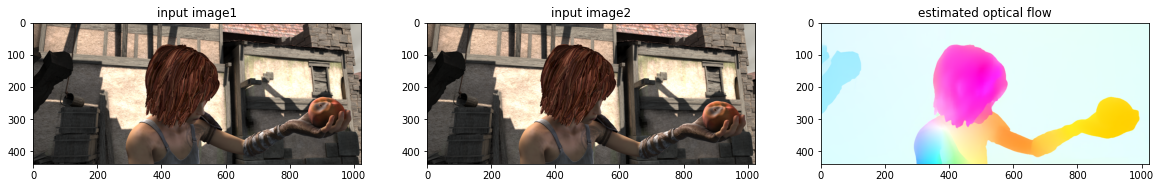

6it [02:33, 25.74s/it]

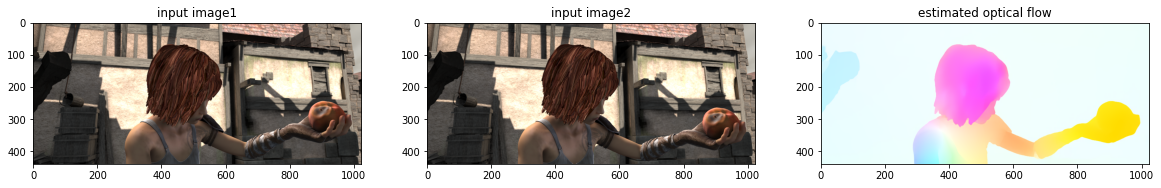

7it [02:59, 25.68s/it]

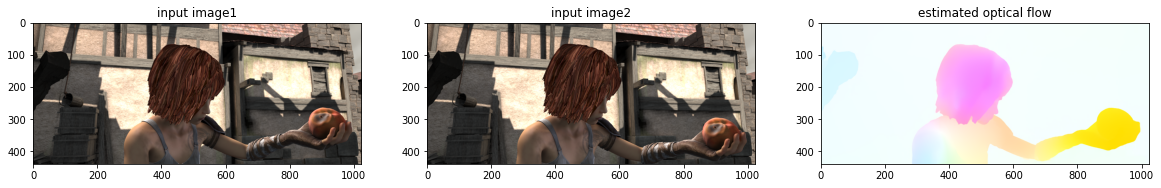

8it [03:24, 25.61s/it]

In [ ]:
model.eval()
n_vis = 10

for file1, file2 in tqdm(zip(image_files[:n_vis], image_files[1:1+n_vis])):
    image1 = load_image(file1, device)
    image2 = load_image(file2, device)

 
    padder = InputPadder(image1.shape)
    image1, image2 = padder.pad(image1, image2)
    
    with torch.no_grad():
        flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)

    viz(image1, image2, flow_up)
